In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import utils
import matplotlib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
from random import seed
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = (16, 8)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   
seed(1)
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
data = pd.read_csv('data/data.csv')

In [3]:
data.head()

,date,variable,value
0,2004-01-01 00:00:00,area_1,16.853
1,2004-01-01 01:00:00,area_1,16.450
2,2004-01-01 02:00:00,area_1,16.517
3,2004-01-01 03:00:00,area_1,16.873
4,2004-01-01 04:00:00,area_1,17.064


In [4]:
data.shape

(51480, 3)

In [5]:
data = pd.DataFrame(data)

In [6]:
data.date = pd.to_datetime(data.date, infer_datetime_format=True )

In [7]:
data = data.set_index(['date'])
data = data.sort_index()

In [8]:
data.head()

,variable,value
date,,
2004-01-01 00:00:00,area_1,16.853
2004-01-01 00:00:00,area_2,126.259
2004-01-01 00:00:00,area_3,79.830
2004-01-01 01:00:00,area_1,16.450
2004-01-01 01:00:00,area_2,123.313


In [9]:
data = data.dropna()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
area_1 = data[data.variable == 'area_1'].drop('variable', axis = 1).dropna().sort_index().asfreq('H')
area_2 = data[data.variable == 'area_2'].drop('variable', axis = 1).dropna().sort_index().asfreq('H')
area_3 = data[data.variable == 'area_3'].drop('variable', axis = 1).dropna().sort_index().asfreq('H')


area_1 = area_1.resample("h").mean()
area_2 = area_2.resample("h").mean()
area_3 = area_3.resample("h").mean()

area_1 = area_1.fillna(area_1.mean())
area_2 = area_2.fillna(area_2.mean())
area_3 = area_3.fillna(area_3.mean())





In [12]:
decomposition_a1 = seasonal_decompose(area_1.value, model='multiplicative')
decomposition_a2 = seasonal_decompose(area_2.value, model='multiplicative')
decomposition_a3 = seasonal_decompose(area_3.value, model='multiplicative')

In [13]:
decomposition_a1.trend.head(20)

date
2004-01-01 00:00:00          NaN
2004-01-01 01:00:00          NaN
2004-01-01 02:00:00          NaN
2004-01-01 03:00:00          NaN
2004-01-01 04:00:00          NaN
2004-01-01 05:00:00          NaN
2004-01-01 06:00:00          NaN
2004-01-01 07:00:00          NaN
2004-01-01 08:00:00          NaN
2004-01-01 09:00:00          NaN
2004-01-01 10:00:00          NaN
2004-01-01 11:00:00          NaN
2004-01-01 12:00:00    16.647125
2004-01-01 13:00:00    16.540667
2004-01-01 14:00:00    16.438375
2004-01-01 15:00:00    16.336667
2004-01-01 16:00:00    16.242333
2004-01-01 17:00:00    16.163187
2004-01-01 18:00:00    16.112583
2004-01-01 19:00:00    16.090917
Freq: H, Name: value, dtype: float64

In [14]:
decomposition_a1.seasonal.head(10)

date
2004-01-01 00:00:00    0.837341
2004-01-01 01:00:00    0.805809
2004-01-01 02:00:00    0.797417
2004-01-01 03:00:00    0.801034
2004-01-01 04:00:00    0.828156
2004-01-01 05:00:00    0.907920
2004-01-01 06:00:00    1.038615
2004-01-01 07:00:00    1.093020
2004-01-01 08:00:00    1.071755
2004-01-01 09:00:00    1.048644
Freq: H, Name: value, dtype: float64

In [15]:
decomposition_a2.trend.head(20)

date
2004-01-01 00:00:00           NaN
2004-01-01 01:00:00           NaN
2004-01-01 02:00:00           NaN
2004-01-01 03:00:00           NaN
2004-01-01 04:00:00           NaN
2004-01-01 05:00:00           NaN
2004-01-01 06:00:00           NaN
2004-01-01 07:00:00           NaN
2004-01-01 08:00:00           NaN
2004-01-01 09:00:00           NaN
2004-01-01 10:00:00           NaN
2004-01-01 11:00:00           NaN
2004-01-01 12:00:00    135.662646
2004-01-01 13:00:00    135.583208
2004-01-01 14:00:00    135.624521
2004-01-01 15:00:00    135.809604
2004-01-01 16:00:00    136.086792
2004-01-01 17:00:00    136.560271
2004-01-01 18:00:00    137.327229
2004-01-01 19:00:00    138.394083
Freq: H, Name: value, dtype: float64

In [16]:
decomposition_a2.seasonal.head(10)

date
2004-01-01 00:00:00    0.851340
2004-01-01 01:00:00    0.826197
2004-01-01 02:00:00    0.813295
2004-01-01 03:00:00    0.812372
2004-01-01 04:00:00    0.830487
2004-01-01 05:00:00    0.880808
2004-01-01 06:00:00    0.964668
2004-01-01 07:00:00    1.024895
2004-01-01 08:00:00    1.043070
2004-01-01 09:00:00    1.057816
Freq: H, Name: value, dtype: float64

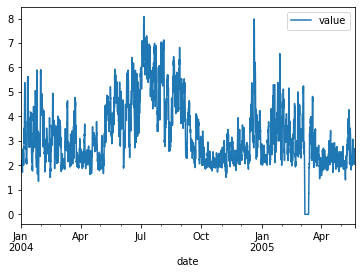

In [17]:
area_1.rolling(30).std().plot()

In [20]:
decomposition_a2 = seasonal_decompose(area_2.value, model='multiplicative')

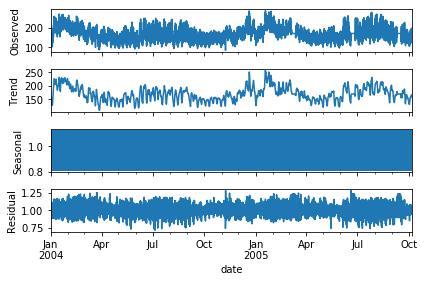

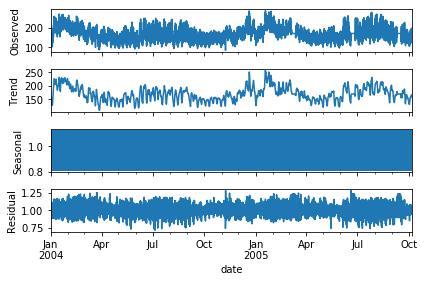

In [18]:
decomposition_a2.plot()

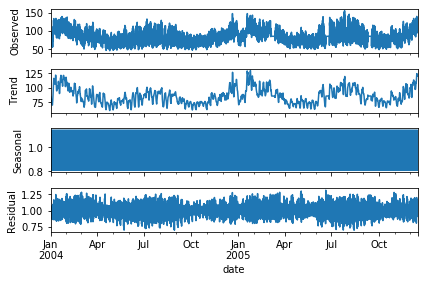

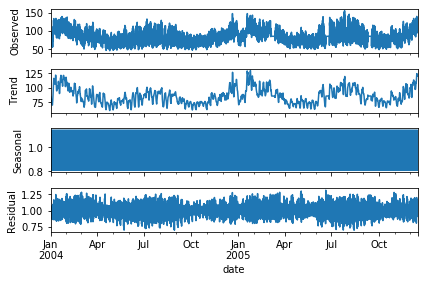

In [19]:
decomposition_a3.plot()


In [20]:
decomposition_a3 = seasonal_decompose(area_3, model='additive')

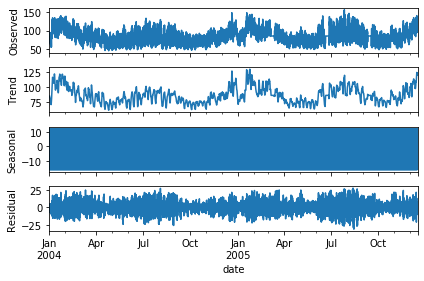

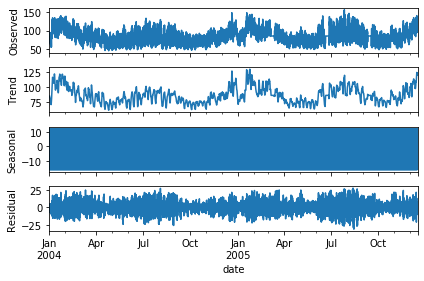

In [21]:
decomposition_a3.plot()

In [22]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

Text(0, 0.5, 'Autocorrelation')

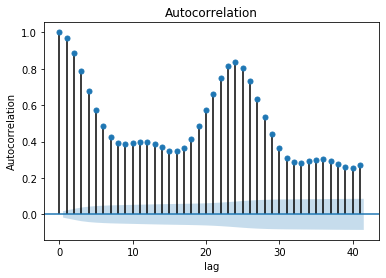

In [23]:
plot_acf(area_1, alpha=.05)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')


Text(0, 0.5, 'Autocorrelation')

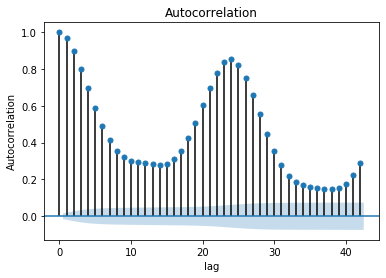

In [24]:
plot_acf(area_2, alpha=.05)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')

Text(0, 0.5, 'Autocorrelation')

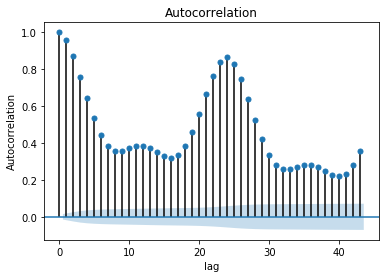

In [25]:
plot_acf(area_3, alpha=.05)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')

In [26]:
train_1 = area_1[:-168]
train_2 = area_2[:-168]
train_3 = area_3[:-168]

test_1 = area_1[-168:]
test_2 = area_2[-168:]
test_3 = area_3[-168:]

model = SARIMAX(train_1,             # <-- holy crap just passed it pandas? No ".values"? No .diff?
                          order=(1, 1, 1),              # <-- keeping our order as before
                          seasonal_order=(1, 0, 1, 12))
results = model.fit(maxiter=100)# <-- We'll get into how we found these hyper params later 
results
pred = results.get_prediction()
predictions = pred.predicted_mean

In [27]:
aic_scores = {}
params_index = {}

for i in range(len(train_1)):
    try: 
        param_set = train_1[i]
        aic = get_aic(train_1_logged, param_set) 
        aic_scores[i] = aic
        params_index[i] = param_set
    
    # this will fail sometimes with impossible parameter combinations. 
    # ... and I'm too lazy to remember what they are. 
    except Exception as e: 
        continue
        

In [28]:
def get_aic(series_, params):
    # extract the params 
    p = params[0] 
    d = params[1] 
    q = params[2] 
    P = params[3]
    D = params[4] 
    Q = params[5]
    S = params[6]
    
    # fit a model with those params 
    model = SARIMAX(series_,order=(p, d, q), seasonal_order=(P, D, Q, S),
                                     enforce_stationarity=False,
                                     enforce_invertibility=False)
    
    # fit the model
    results = model.fit(maxiter=200)
    
    # return the aic 
    return results.aic
get_aic(train_1, )

TypeError: get_aic() missing 1 required positional argument: 'params'

In [ ]:
# For the other parameters use:
p = 1
d = 1  # interesting...
q = 1
P = 1
D = 0
Q = 0 

temp = pd.DataFrame(params_index).T
temp.columns = ['p', 'd', 'q', 'P', 'D', 'Q', 'S']
temp['aic'] = pd.Series(train_1)
temp.sort_values('aic').head()


In [ ]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
model = SARIMAX(train_1,             # <-- holy crap just passed it pandas? No ".values"? No .diff?
                          order=(1, 0, 1),              # <-- keeping our order as before
                          seasonal_order=(1, 0, 1, 24),
                          enforce_stationarity=False,
                          enforce_invertibility=False)
results = model.fit(maxiter=100)
predictions = results.get_prediction()
predicted_mean = predictions.predicted_mean
predicted_mean_delogged = predicted_mean.map(np.exp)
predicted_mean_delogged_loc = predicted_mean_delogged[1:]
mae = mean_absolute_error(emissions_train[1:],predicted_mean_delogged_loc)
predictions.head()

In [ ]:
plot_pacf(area_1, alpha=.05)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')

In [ ]:
plot_pacf(area_2, alpha=.05, lags = 40)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')

In [ ]:
plot_pacf(area_3, alpha=.05)
plt.xlabel('lag')
plt.ylabel('Autocorrelation')

In [ ]:
area_1.pct_change().head()

In [ ]:
changes_3 = area_3.loc['2004'].pct_change()
corr_chan3 = changes_3

In [ ]:
area_2.loc['2004'].pct_change().head()

In [ ]:
area_1.loc['2004'].pct_change().head()

In [ ]:
! pip install seaborn


In [ ]:
import seaborn as sns
sns.boxplot(area_1['value'])

In [ ]:
train_1 = area_1[:-168]
test_1 = area_1[-168:]

for i in (train_1, test_1):
    i['year']= i['date'].dt.year 
    i['month']=i['date'].dt.month 
    i['day']=i['date'].dt.day
    i['Hour']=i['date'].dt.hour 



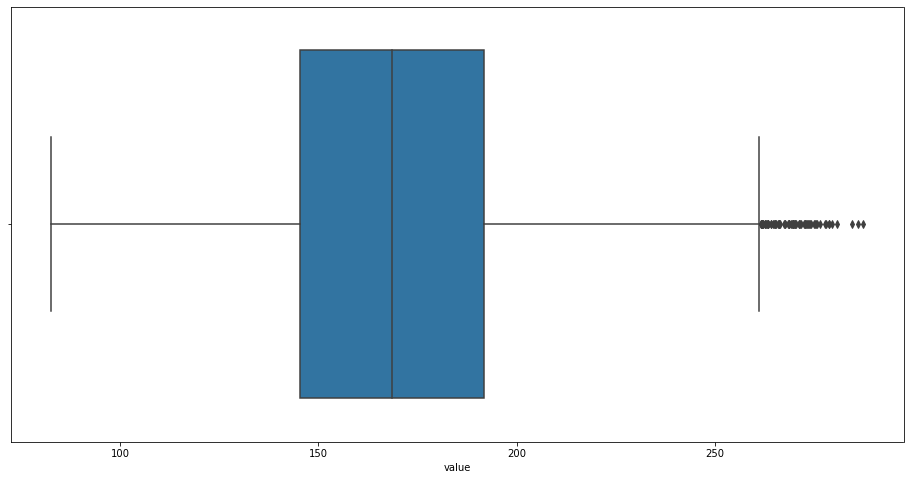

In [54]:
sns.boxplot(area_2['value'])

In [ ]:
sns.boxplot(area_3['value'])

In [ ]:
daily_diff_1 = area_1.diff()
daily_diff_2  = area_2.diff()
daily_diff_3  = area_3.diff()

In [ ]:
moving_avg_per_hour1 = area_1.rolling(24, min_periods=0).mean().plot()

In [ ]:
moving_avg_per_hour2 = area_2.rolling(24, min_periods=0).mean().plot()

In [ ]:
moving_avg_per_hour3 = area_3.rolling(24, min_periods=0).mean().plot()

In [ ]:
moving_avg_per_hour2

In [ ]:
train_1 = area_1[:-168]
train_2 = area_2[:-168]
train_3 = area_3[:-168]

test_1 = area_1[-168:]
test_2 = area_2[-168:]
test_3 = area_3[-168:]

In [ ]:
area_1_day = area_1.index.to_period('W')
area_1.head()

In [ ]:
area_1.loc['2004']['value'].resample('M').mean().plot()

In [ ]:
area_2.loc['2004']['value'].resample('M').mean().plot()

In [ ]:
area_3.loc['2004']['value'].resample('M').mean().plot()

In [48]:
train_1 = area_1[:-168]
train_2 = area_2[:-168]
train_3 = area_3[:-168]

train_1.groupby('weekday')['value'].mean().plot()


KeyError: 'weekday'

In [ ]:
area_1.loc['2004-01']['value'].resample('D').mean().plot()

In [ ]:
area_1.loc['2004-03']['value'].resample('D').mean().plot()

In [ ]:
area_1.loc['2004-07']['value'].resample('D').mean().plot()

In [ ]:
train_1 = area_1[:-168]
train_2 = area_2[:-168]
train_3 = area_3[:-168]

test_1 = area_1[-168:]
test_2 = area_2[-168:]
test_3 = area_3[-168:]

train_1 = train_1.reset_index()
test_1 = test_1.reset_index()

train_1


In [ ]:
for i in (train_1, test_1):
    i['year']= i['date'].dt.year 
    i['month']=i['date'].dt.month 
    i['day']=i['date'].dt.day
    i['Hour']=i['date'].dt.hour 

In [ ]:
train_1.head()

In [ ]:
train_1['day of week']=train_1['date'].dt.dayofweek 
temp = train_1['date']

In [ ]:
train_1.groupby('day of week')['value'].sum().plot(figsize = (16,3))

In [ ]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train_1['date'].apply(applyer) 
train_1['weekend']=temp2

In [ ]:
train_1.groupby('day of week')['value'].sum().plot()

In [ ]:
train_1.groupby('weekday')['value'].mean().plot.bar()

In [ ]:
train_1.groupby('year')['value'].sum().plot.bar()

In [ ]:
train_1['pct_change'] = train_1.pct_change()

In [2]:
train_lag_1 = train_1.shift(1)

NameError: name 'train_1' is not defined

In [ ]:
prediction_window = 36
best_params_multistep = get_best_params(train_1[1:], inputs, method = 'validation split', prediction_window = 36)
best_params_multistep

In [80]:
model = SARIMAX(train_1,             # <-- holy crap just passed it pandas? No ".values"? No .diff?
                          order=(1, 0, 1),              # <-- keeping our order as before
                          seasonal_order=(1, 0, 1, 24),
                          enforce_stationarity=False,
                          enforce_invertibility=False)
results = model.fit(maxiter=100)
predictions = results.get_forecast(steps=prediction_window)
predicted_mean = predictions.predicted_mean
predicted_mean_delogged = np.exp(predicted_mean)
mae = mean_absolute_error(emissions_test, predicted_mean_delogged)
mae

NameError: name 'prediction_window' is not defined

In [ ]:
model = SARIMAX(train_2,             # <-- holy crap just passed it pandas? No ".values"? No .diff?
                          order=(1, 0, 1),              # <-- keeping our order as before
                          seasonal_order=(1, 0, 1, 24),
                          enforce_stationarity=False,
                          enforce_invertibility=False)
results = model.fit(maxiter=100)
predictions = results.get_forecast(steps=prediction_window)
predicted_mean = predictions.predicted_mean
predicted_mean_delogged = np.exp(predicted_mean)
mae = mean_absolute_error(emissions_test, predicted_mean_delogged)
mae

In [ ]:
model = SARIMAX(train_3,             # <-- holy crap just passed it pandas? No ".values"? No .diff?
                          order=(1, 0, 1),              # <-- keeping our order as before
                          seasonal_order=(1, 0, 1, 24),
                          enforce_stationarity=False,
                          enforce_invertibility=False)
results = model.fit(maxiter=100)
predictions = results.get_forecast(steps=prediction_window)
predicted_mean = predictions.predicted_mean
predicted_mean_delogged = np.exp(predicted_mean)
mae = mean_absolute_error(emissions_test, predicted_mean_delogged)
mae